# Title : Data analysis and visualization of IPO's of Indian stock market

Importing libraries

In [2]:
# for mathematical computation

import pandas as pd
import numpy as np

In [3]:
# for visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# loading dataset
df = pd.read_csv('IPO.csv')

In [5]:
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Current_gains
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45,-3.10
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85,224.80
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05",-11.18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",-23.02
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05,-18.63


In [6]:
# more info. from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                288 non-null    object 
 1   IPO_Name            288 non-null    object 
 2   Issue_Size(crores)  288 non-null    float64
 3   QIB                 288 non-null    float64
 4   HNI                 288 non-null    float64
 5   RII                 288 non-null    float64
 6   Issue_price         288 non-null    float64
 7   Listing_Open        288 non-null    float64
 8   Listing_Close       288 non-null    float64
 9   Listing_Gains(%)    288 non-null    float64
 10  CMP                 288 non-null    object 
 11  Current_gains       286 non-null    float64
dtypes: float64(9), object(3)
memory usage: 27.1+ KB


In [7]:
df.describe()

,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),Current_gains
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,286.000000
mean,1118.383750,24.834688,71.413646,8.341181,368.913194,438.374653,396.502917,5.993056,65.616573
std,2160.932743,37.837647,142.500596,14.159700,361.287606,458.703932,439.609061,49.354577,261.408128
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.930000
25%,156.142500,1.147500,1.210000,1.367500,113.750000,125.200000,104.112500,-11.340000,-73.785000
50%,474.000000,4.810000,5.075000,3.405000,242.500000,272.200000,234.555000,2.315000,-1.800000
75%,1049.480000,35.492500,73.295000,8.535000,522.500000,600.000000,584.975000,25.780000,114.397500
max,18915.900000,176.850000,958.070000,119.440000,2150.000000,2725.000000,3118.650000,270.400000,2478.690000


In [8]:
df.isnull().sum()

Date                  0
IPO_Name              0
Issue_Size(crores)    0
QIB                   0
HNI                   0
RII                   0
Issue_price           0
Listing_Open          0
Listing_Close         0
Listing_Gains(%)      0
CMP                   0
Current_gains         2
dtype: int64

In [9]:
# dropping Current_gains column
df = df.drop('Current_gains', axis='columns') 

In [10]:
df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.0,840.00,26.89,641.45
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.0,488.60,148.02,639.85
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.0,1216.05,3.06,"1,048.05"
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00"
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.0,509.85,-5.93,441.05


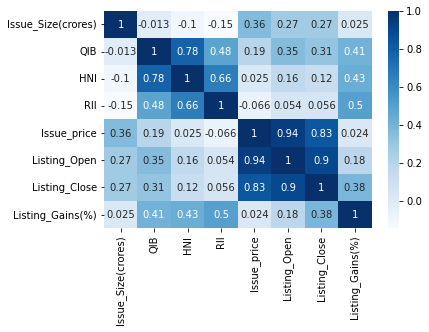

In [11]:
# correlation(Heatmap)
v1 = sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = 7,6

Inferences:

1) High Net-worth Individual(HNI) is very positively correlated to Qualified institutional buyer(QIB).

2) Retail individual investor(RII) is very positively correlated to HNI.

3) The issue price is highly positively correlated to Listing open and listing close.

In [12]:
# splitting date into Month, Day, Year column
date = df.Date.str.split('-', expand =True)
df['Year'] = date[2]
df['Month'] = date[1]
df['Day'] = date[0]
df.year = pd.to_numeric(df.Year)
df.month = pd.to_numeric(df.Month)
df.day = pd.to_numeric(df.Day)

C:\Users\User\AppData\Local\Temp/ipykernel_18884/1926188089.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year = pd.to_numeric(df.Year)
C:\Users\User\AppData\Local\Temp/ipykernel_18884/1926188089.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month = pd.to_numeric(df.Month)
C:\Users\User\AppData\Local\Temp/ipykernel_18884/1926188089.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.day = pd.to_numeric(df.Day)


In [13]:
df

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Year,Month,Day
0,26-11-21,Tarsons Product,1030.22,1.06,3.40,2.49,662.0,700.00,840.00,26.89,641.45,21,11,26
1,23-11-21,Latent View,622.11,145.48,850.66,119.44,197.0,530.00,488.60,148.02,639.85,21,11,23
2,18-11-21,Sapphire Foods,2073.00,3.11,2.34,5.25,1180.0,1311.00,1216.05,3.06,"1,048.05",21,11,18
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.00,1564.15,-27.25,"1,655.00",21,11,18
4,15-11-21,SJS Enterprises,816.57,1.42,2.32,1.38,542.0,514.00,509.85,-5.93,441.05,21,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,19-02-10,Thangamayil,0.00,0.52,1.52,2.26,75.0,70.00,71.10,-5.20,"1,363.90",10,02,19
284,15-02-10,Syncom Health,56.25,0.99,16.60,6.25,75.0,88.00,87.85,17.13,4.06,10,02,15
285,15-02-10,Vascon Engineer,199.80,1.12,3.65,0.62,165.0,155.90,146.38,-11.28,23.10,10,02,15
286,08-02-10,Jubilant Food,328.70,59.39,51.95,3.79,145.0,160.00,114.50,-21.03,"3,739.10",10,02,08


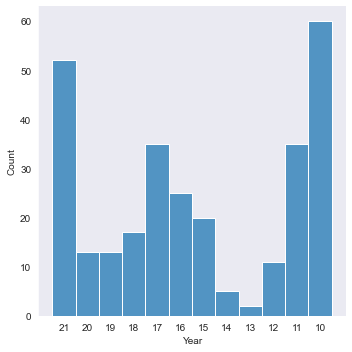

In [14]:
# IPO's launch year wise
sns.set_style('dark')
v2 = sns.displot(df['Year'],)
plt.rcParams['figure.figsize'] = 10,9
plt.show()

Inference: Majority of the IPO's are listed in year 2010, then in 2021

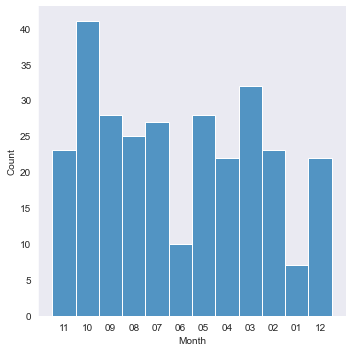

In [15]:
# IPO's launch month wise
v3 = sns.displot(df['Month'])

Inference: In the month of October maximum IPO's were launched

In [16]:
# top gainers at the time of listing
k1 = df.groupby('IPO_Name').sum().sort_values('Listing_Gains(%)', ascending = False).head(10)
k1 = k1.reset_index()
k1

,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%)
0,Sigachi Ind,0.00,42.15,78.82,41.26,163.0,575.00,603.75,270.40
1,Paras Defence,181.13,90.48,435.14,61.42,175.0,475.00,498.75,185.00
2,Birla Pacific,65.18,1.04,0.17,1.82,10.0,10.10,25.35,153.50
3,Salasar Techno,35.87,0.00,487.18,58.59,108.0,259.45,272.10,151.94
4,Latent View,622.11,145.48,850.66,119.44,197.0,530.00,488.60,148.02
5,Astron Paper &,70.00,103.35,396.99,77.93,50.0,120.75,119.70,139.40
6,Burger King,796.50,86.64,354.11,68.15,60.0,115.35,138.40,130.67
7,Happiest Minds,702.02,77.43,351.46,70.94,166.0,351.00,371.00,123.49
8,Avenue Supermar,1870.00,144.61,277.74,7.30,299.0,604.00,640.75,114.30
9,Tatva Chintan,500.00,2.55,9.78,13.36,1083.0,2111.80,2310.25,113.32


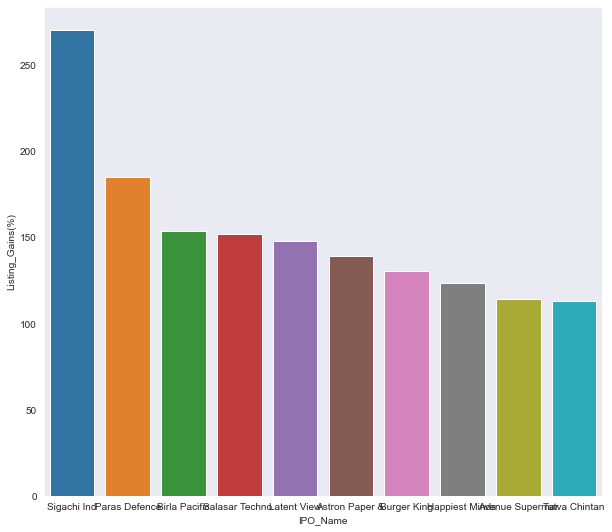

In [17]:
v4 = sns.barplot(data = k1, x='IPO_Name', y='Listing_Gains(%)')
plt.rcParams['figure.figsize'] = 15,6

Inference: Sigachi Ind has a listing gain of 270.4%, Paras Defence with a gain of 185%

In [18]:
df[df['IPO_Name'] == 'Sigachi Ind']

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Year,Month,Day
6,15-11-21,Sigachi Ind,0.0,42.15,78.82,41.26,163.0,575.0,603.75,270.4,429.35,21,11,15


In [19]:
# top loosers at the time of listing
k2 = df.groupby('IPO_Name').sum().sort_values('Listing_Gains(%)', ascending = True).head(10)
k2 = k2.reset_index()
k2

,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%)
0,VKS Projects,55.00,1.15,0.38,1.13,55.0,55.8,1.57,-97.15
1,IEX,1000.70,2.56,0.85,2.61,1650.0,1500.0,54.22,-96.71
2,Inventure Grow,81.90,0.25,9.49,8.66,117.0,119.0,5.20,-95.56
3,NBCC (India),127.20,7.07,1.70,3.40,106.0,100.0,6.47,-93.90
4,BS Limited,197.36,0.52,3.16,1.04,248.0,251.0,18.93,-92.37
5,Goenka Diamond,145.00,0.78,2.99,0.66,135.0,130.0,12.79,-90.53
6,Aqua Logistics,150.00,0.26,5.07,3.00,220.0,225.0,24.46,-88.88
7,Gyscoal Alloys,54.67,1.54,33.44,8.00,71.0,76.6,8.16,-88.51
8,Kridhan Infra,34.75,0.03,1.37,4.18,108.0,115.0,13.29,-87.69
9,Setubandhan Inf,60.00,0.31,2.76,4.68,138.0,145.0,22.95,-83.37


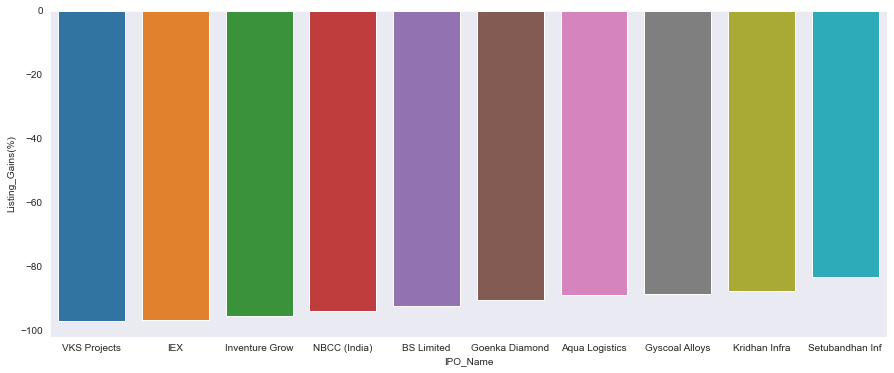

In [20]:
v5 = sns.barplot(data=k2, x='IPO_Name', y='Listing_Gains(%)')

Inference: VKS Projects is the biggest looser at the time of listing.

In [21]:
# top 10 IPO's in terms of issue size
k3 = df.sort_values('Issue_Size(crores)', ascending = False).head(10)
k3

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,Listing_Close,Listing_Gains(%),CMP,Year,Month,Day
3,18-11-21,One 97(Paytm),18915.90,2.79,0.24,1.66,2150.0,1955.0,1564.15,-27.25,"1,655.00",21,11,18
234,04-11-10,Coal India,15475.00,24.70,25.40,2.31,245.0,300.0,342.35,39.73,151.15,10,11,04
102,25-10-17,General Insuran,11372.00,2.25,0.22,0.63,912.0,870.4,435.20,-52.28,141.05,17,10,25
64,16-03-20,SBI Card,10286.20,57.18,45.23,2.50,755.0,658.0,683.20,-9.51,986.65,20,03,16
25,23-07-21,Zomato,9375.00,51.79,32.96,7.45,76.0,115.0,125.85,65.59,142.00,21,07,23
98,17-11-17,HDFC Life,8695.01,16.60,2.29,0.90,290.0,313.0,344.25,18.71,688.85,17,11,17
106,03-10-17,SBI Life Insura,8400.00,12.56,0.70,0.81,700.0,735.0,708.00,1.14,"1,158.30",17,10,03
33,14-05-21,PowerGrid InvIT,7734.99,0.00,0.00,0.00,100.0,104.0,102.98,2.98,120.05,21,05,14
54,20-11-20,Gland,6479.55,6.40,0.51,0.24,1500.0,1710.0,1820.45,21.36,"3,600.95",20,11,20
5,15-11-21,PB Fintech,6273.50,9.83,2.58,1.67,980.0,1444.0,1202.90,22.74,"1,210.50",21,11,15


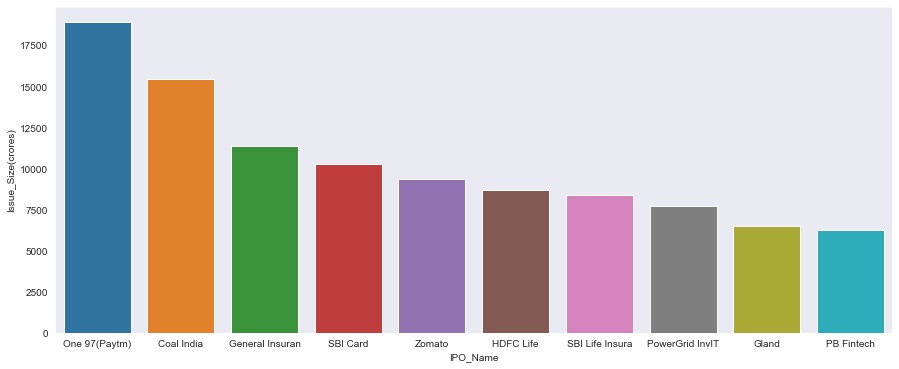

In [22]:
v6 = sns.barplot(data = k3, x = 'IPO_Name', y = 'Issue_Size(crores)') 

Inference: One 97(Paytm) issued the largest size IPO of 18915 crores

In [23]:
## No. of IPO listed in year 2021
len(df[df['Year'] == '21'])

52

In [1]:
df.columns

NameError: name 'df' is not defined